In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
dfs = pd.read_csv("D:\Download_Ddrive\default.csv",skiprows=1)
dfs=dfs.rename(index=str, columns={"default payment next month": "default"})
dfs.tail(10)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [2]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 6.0+ MB


# Questions asked and investigated 
# 1. Is the proportion of defaults the same for men and women?


In [3]:
dfs_m=dfs[dfs.SEX==1]
dfs_f=dfs[dfs.SEX==2]
dfs_m_def=dfs_m[dfs_m.default == 1].default.count()
dfs_f_def=dfs_f[dfs_f.default == 1].default.count()
def_m_prop=dfs_m_def/dfs_m.default.count()
def_f_prop=dfs_f_def/dfs_f.default.count()
print("Proportion of male defaulters is: "+str(def_m_prop))
print("Proportion of female defaulters is: "+str(def_f_prop))
total_num_m=dfs[dfs.SEX==1].SEX.count()
total_num_f=dfs[dfs.SEX==2].SEX.count()
print("Total number of males in data: "+str(total_num_m))
print("Total number of females in data: "+str(total_num_f))

Proportion of male defaulters is: 0.2416722745625841
Proportion of female defaulters is: 0.20776280918727916
Total number of males in data: 11888
Total number of females in data: 18112


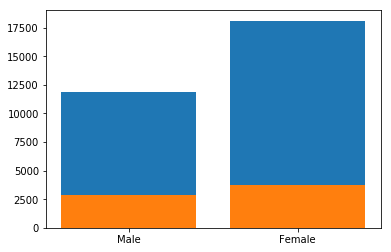

In [4]:
range=[1,2]
plt.bar(range,[total_num_m,total_num_f])
plt.bar(range,[dfs_m_def,dfs_f_def])
plt.xticks(range,["Male","Female"])
plt.show()

In [5]:
# data wrangling to make any education value given above 4 to equals 4.
dfs.loc[dfs.EDUCATION>4]=4
dfs[dfs.EDUCATION>4].count()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

# 2. Does Education level matter for predicting default or not default ?

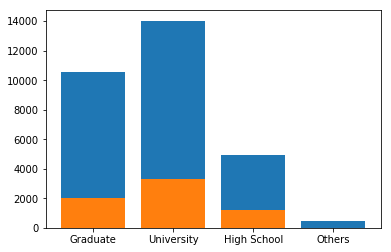

In [6]:
dfs_edu_1=dfs[dfs.EDUCATION ==1]
dfs_edu_2=dfs[dfs.EDUCATION ==2]
dfs_edu_3=dfs[dfs.EDUCATION ==3]
dfs_edu_4=dfs[dfs.EDUCATION ==4]

dfs_edu_def_1=dfs_edu_1[dfs_edu_1.default==1].default.count()
dfs_edu_def_2=dfs_edu_2[dfs_edu_2.default==1].default.count()
dfs_edu_def_3=dfs_edu_3[dfs_edu_3.default==1].default.count()
dfs_edu_def_4=dfs_edu_4[dfs_edu_4.default==1].default.count()

dfs_edu_1=dfs[dfs.EDUCATION ==1].EDUCATION.count()
dfs_edu_2=dfs[dfs.EDUCATION ==2].EDUCATION.count()
dfs_edu_3=dfs[dfs.EDUCATION ==3].EDUCATION.count()
dfs_edu_4=dfs[dfs.EDUCATION ==4].EDUCATION.count()

range=[1,2,3,4]
plt.bar(range,[dfs_edu_1,dfs_edu_2,dfs_edu_3,dfs_edu_4])
plt.bar(range,[dfs_edu_def_1,dfs_edu_def_2,dfs_edu_def_3,dfs_edu_def_4])
plt.xticks(range,["Graduate","University","High School","Others"])
plt.show()

In [15]:
education= dfs["EDUCATION"]
def_edu=dfs["EDUCATION"][dfs.default==1]

def_edu.value_counts()/education.value_counts()

0         NaN
1    0.192420
2    0.237379
3    0.234500
4    0.056911
Name: EDUCATION, dtype: float64

# DEFAULT BY EDUCATION
# 1. GRADUATE defaulters are 19.24%.
# 2. UNIVERSITY defaulters are 23.74%.
# 3. HIGH SCHOOL defaulters are 23.45%.
# 4. OTHER defaulters are 5.7%.
# -------------------------------------------------------------------------

# 3. Does credit card limit have a connection with being a defaulter or not ?

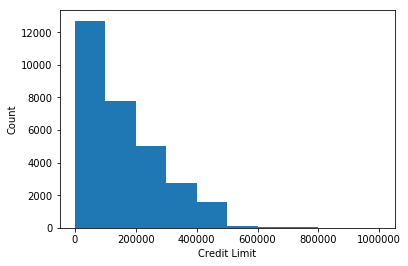

In [7]:
dfs['LIMIT_BAL'].plot(kind='hist')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

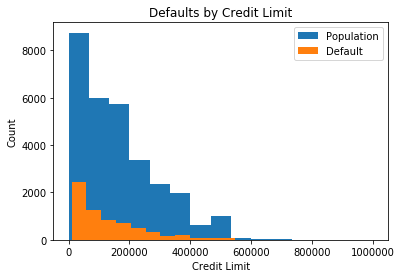

In [8]:
# defining variables for credit limit and defaults by credit limit
credit = dfs['LIMIT_BAL']
def_by_cred = dfs['LIMIT_BAL'][dfs.default == 1]

#plotting a histogram
_ = plt.hist(credit, bins=15)
_ = plt.hist(def_by_cred, bins=15)
plt.title('Defaults by Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.legend(('Population', 'Default'))
plt.show()

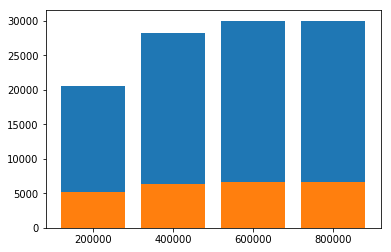

Proportion of defualters with less than or equal to limit balance of 200000: 0.25349018842136095
Proportion of defualters with less than or equal to limit balance of 400000: 0.2264639160640862
Proportion of defualters with less than or equal to limit balance of 600000: 0.22054744159620335
Proportion of defualters with less than or equal to limit balance of 800000: 0.22017400580019333


In [52]:
def_200000=dfs["LIMIT_BAL"][dfs.default==1][dfs.LIMIT_BAL<=200000].count()
def_400000=dfs["LIMIT_BAL"][dfs.default==1][dfs.LIMIT_BAL<=400000].count()
def_600000=dfs["LIMIT_BAL"][dfs.default==1][dfs.LIMIT_BAL<=600000].count()
def_800000=dfs["LIMIT_BAL"][dfs.default==1][dfs.LIMIT_BAL<=800000].count()

df_200000=dfs["LIMIT_BAL"][dfs.LIMIT_BAL<=200000].count()
df_400000=dfs["LIMIT_BAL"][dfs.LIMIT_BAL<=400000].count()
df_600000=dfs["LIMIT_BAL"][dfs.LIMIT_BAL<=600000].count()
df_800000=dfs["LIMIT_BAL"][dfs.LIMIT_BAL<=800000].count()

range=[1,2,3,4]
plt.bar(range,[df_200000,df_400000,df_600000,df_800000])
plt.bar(range,[def_200000,def_400000,def_600000,def_800000])
plt.xticks(range,["200000","400000","600000","800000"])
plt.show()

print("Proportion of defualters with less than or equal to limit balance of 200000: "+ str(def_200000/df_200000))
print("Proportion of defualters with less than or equal to limit balance of 400000: "+ str(def_400000/df_400000))
print("Proportion of defualters with less than or equal to limit balance of 600000: "+ str(def_600000/df_600000))
print("Proportion of defualters with less than or equal to limit balance of 800000: "+ str(def_800000/df_800000))

# Proportion of defualters with less than or equal to limit balance of 200000: 25.34%.
# Proportion of defualters with less than or equal to limit balance of 400000: 22.64%.
# Proportion of defualters with less than or equal to limit balance of 600000: 22.05%.
# Proportion of defualters with less than or equal to limit balance of 800000: 22.01%.

# 4. Does Marital Status have anything to do with being a defaulter or not ?

In [12]:
# Data wrangling values that are other than 1,2,3 to 3(which is labeled "Other") for the sake of simplicity.
dfs.loc[dfs.MARRIAGE==0]=3
dfs.loc[dfs.MARRIAGE==4]=3

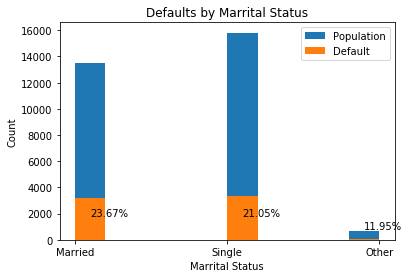

In [13]:
def_by_ms = dfs[dfs.default == 1].MARRIAGE
marital = dfs["MARRIAGE"]

_ = plt.hist(marital)
_ = plt.hist(def_by_ms)
plt.title('Defaults by Marrital Status')
plt.xlabel('Marrital Status')
plt.ylabel('Count')
plt.legend(('Population', 'Default'))
plt.xticks([1, 2, 3], ['Married', 'Single', 'Other'])
plt.annotate('23.67%', xy=(1.1, 1800))
plt.annotate('21.05%', xy=(2.1, 1800))
plt.annotate('11.95%', xy=(2.9, 800))
plt.show()

In [14]:
def_by_ms.value_counts() / marital.value_counts()

2    0.210483
1    0.236778
3    0.119488
Name: MARRIAGE, dtype: float64

# DEFAULT BY MARITAL STATUS
# MARRIED  defaulters are 23.67 %.
# SINGLE   defaulters are 21.05 %.
# OTHER  defaulters are 11.95 %.